Unsupervised --> Clustering - find groups that exist in the data already

Until now, we haven't talked much about unsupervised learning. We use unsupervised methods when we don't have labeled data. There are no true targets to predict, we derive the likely categories from the structure in our data.

Helpful uses for clustering:
- Find items with similar behavior (users, products, voters, etc)
- Market segmentation
- Understand complex systems
- Discover meaningful categories for your data
- Reduce the number of classes by grouping
- Reduce the dimensions of your problem
- Pre-processing! Create labels for supervised learning

In [1]:
import pandas as pd
import numpy as np

from sklearn import cluster
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

import time

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [3]:
df = pd.read_csv('../data/california.csv', low_memory=False)
df.drop(columns='Unnamed: 0', inplace=True)
df.head(3)

,nwcg_reporting_unit_name,fire_name,complex_name,fire_year,discovery_doy,discovery_time,stat_cause_descr,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,state,county,discovery_date,cont_date,discovery_month,discovery_day_of_week,cont_month,cont_day_of_week,discovery_day_of_week_word,cont_day_of_week_word
0,Plumas National Forest,FOUNTAIN,NaN,2005,33,1300.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,63,2005-02-02,2005-02-02,2,2,2.0,2.0,wednesday,wednesday
1,Eldorado National Forest,PIGEON,NaN,2004,133,845.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,61,2004-05-12,2004-05-12,5,2,5.0,2.0,wednesday,wednesday
2,Eldorado National Forest,SLACK,NaN,2004,152,1921.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,17,2004-05-31,2004-05-31,5,0,5.0,0.0,monday,monday


In [4]:
df['stat_cause_descr_code'] = df['stat_cause_descr'].map({'Miscellaneous':0,
                                                                'Equipment Use':1,
                                                                'Lightning':2,
                                                               'Arson': 3 ,
                                                               'Debris Burning':4, 
                                                               'Missing/Undefined': 5, 
                                                               'Campfire': 6, 
                                                               'Children': 7,
                                                               'Smoking':8, 
                                                               'Powerline':9, 
                                                               'Railroad':10, 
                                                               'Fireworks':11, 
                                                               'Structure':12
                                                              })

In [5]:
df.head(3)

,nwcg_reporting_unit_name,fire_name,complex_name,fire_year,discovery_doy,discovery_time,stat_cause_descr,cont_doy,cont_time,fire_size,fire_size_class,latitude,longitude,state,county,discovery_date,cont_date,discovery_month,discovery_day_of_week,cont_month,cont_day_of_week,discovery_day_of_week_word,cont_day_of_week_word,stat_cause_descr_code
0,Plumas National Forest,FOUNTAIN,NaN,2005,33,1300.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,CA,63,2005-02-02,2005-02-02,2,2,2.0,2.0,wednesday,wednesday,0
1,Eldorado National Forest,PIGEON,NaN,2004,133,845.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,CA,61,2004-05-12,2004-05-12,5,2,5.0,2.0,wednesday,wednesday,2
2,Eldorado National Forest,SLACK,NaN,2004,152,1921.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,CA,17,2004-05-31,2004-05-31,5,0,5.0,0.0,monday,monday,4


In [6]:
# features = ['fire_year',
#              'discovery_date',
#              'discovery_doy',
#             'discovery_day_of_week',
#             'discovery_month',
#              'fire_size',
#              'latitude',
#              'longitude']

In [7]:
features = ['fire_year',
             'fire_size',
             'latitude',
             'longitude']

In [8]:
df[features].isna().sum()

fire_year    0
fire_size    0
latitude     0
longitude    0
dtype: int64

In [9]:
# Plot the Data to see the distributions/relationships
# import seaborn as sns

# # Plot without the "species" hue.
# sns.pairplot(df[features])

In [10]:
X = df[features]
y = df.stat_cause_descr_code

In [14]:
# Scaled X
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [15]:
# ? Clusters
k_mean = KMeans()
k_mean.fit(X_sc)

labels = k_mean.labels_
clusters = k_mean.cluster_centers_

start_time = time.time()

print(silhouette_score(X_sc, labels))

end_time = time.time()
print()
print('Took %s seconds to calculate.' % (end_time - start_time))


0.3461952407385868

Took 407.5424978733063 seconds to calculate.


<ipython-input-16-763a1aec59b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2['clusters']=labels



Took 69.69395732879639 seconds to calculate.


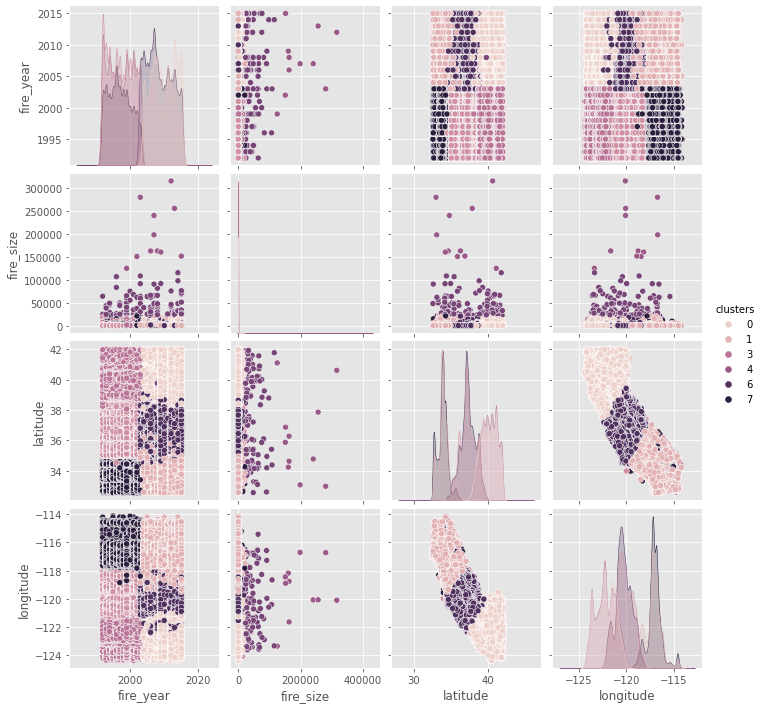

In [16]:
# visually examine the cluster that have been created
start_time = time.time()

X_2 = df[features]
X_2['clusters']=labels

sns.pairplot(data=X_2, hue='clusters')

end_time = time.time()
print()
print('Took %s seconds to calculate.' % (end_time - start_time))

In [ ]:
.describe

In [ ]:
groupby()

In [ ]:
# 4 Clusters
start_time = time.time()

k_mean4 = KMeans(n_clusters=4)
k_mean4.fit(X_sc)
labels_4 = k_mean4.labels_
print(silhouette_score(X_sc, labels_4))

end_time = time.time()
print()
print('Took %s seconds to calculate.' % (end_time - start_time))

In [ ]:
start_time = time.time()

X_4 = df[features]
X_4['clusters']=labels_4

sns.pairplot(data=X_4, hue='clusters')

end_time = time.time()
print()
print('Took %s seconds to calculate.' % (end_time - start_time))

In [ ]:
# 6 Clusters
start_time = time.time()

k_mean6 = KMeans(n_clusters=6)
k_mean6.fit(X_sc)
labels_6 = k_mean6.labels_
print(silhouette_score(X, labels_6))

end_time = time.time()
print()
print('Took %s seconds to calculate.' % (end_time - start_time))

In [ ]:
start_time = time.time()

X_6 = df[features]
X_6['clusters']=labels_6

sns.pairplot(data=X_6, hue='clusters')

end_time = time.time()
print()
print('Took %s seconds to calculate.' % (end_time - start_time))

In [ ]:
# visually examine the cluster that have been created
# X_8 = seeds.drop('species', axis=1)
# X_8['clusters']=labels

# sns.pairplot(data=X_8, hue='clusters')